# Analyse exploratoire et ACP du jeu de données mfeat : 

&nbsp;

**Description**  
On dispose de 2000 images décrites par 6 ensembles d’indicateurs (coefficients de Fourier, profil de corrélations, coefficients de Karhunen-Love, valeurs des pixels moyennés, moments de Zernike, morphologie). Chacune de ces images représente un chiffre manuscrit. Une description des données est disponible [ici](https://archive.ics.uci.edu/ml/datasets/Multiple+Features).

Quelques liens pour comprendre la signification des variables:  

* Série de Fourier: http://maths.cnam.fr/Didacticiels/Sur_Le_Traitement_Du_Son/coinmath.htm  


* Coefficient de Karhunen-Love: http://www.tsi.enst.fr/pages/enseignement/ressources/mti/KL/site/principe_KL.html  


* Pour les pixels : https://images.math.cnrs.fr/Le-traitement-numerique-des-images.html?lang=fr  

##### RUBRIQUES

[IMPORTS](#imports)  

[REGLAGES DU NOTEBOOK](#reglages)  

[IMPORT, VÉRIFICATION ET MANIPULATION DES DONNÉES](#import_check)

[ANALYSE UNIVARIÉE ET BIVARIÉE](#analyse_exploratoire_uni_bi)
    
[ANALYSE MULTIVARIÉE : ACP (basée sur la SVD)](#analyse_exploratoire_multi_acp) 

[REQUIREMENTS.txt](#requirements)

## <a id="imports" style="color:black">IMPORTS</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
from utils.funcs import heatmap, annotate_heatmap

## <a id="reglages" style="color:black">REGLAGES DU NOTEBOOK</a>

In [3]:
## Nombre de lignes/colonnes que Pandas peut afficher dans le notebook
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_columns', 500)


## Hauteur/largeur maximale des cellules que Pandas peut afficher dans le notebook sans tronquer
#pd.set_option('display.width', 1000)


## Affichage des nombres à virgule en gardant seulement 5 chiffres après la virgule
pd.set_option('display.float_format', lambda x: '%.5f' % x)


## Nombre d'éléments max qu'on peut afficher dans un array + suppression de notation scientifique
np.set_printoptions(threshold=200,suppress=True)

## <a id="import_check" style="color:black">IMPORT, VÉRIFICATION ET MANIPULATION DES DONNÉES</a>

In [4]:
## Données
df_train = pd.read_csv("../data/csv-txt/mfeat/data_train.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 650 entries, fac_1 to class
dtypes: float64(190), int64(460)
memory usage: 7.4 MB


In [6]:
df_train.dtypes

fac_1       int64
fac_2       int64
fac_3       int64
fac_4       int64
fac_5       int64
           ...   
zer_44    float64
zer_45    float64
zer_46    float64
zer_47    float64
class       int64
Length: 650, dtype: object

In [7]:
# Mettre la variable 'class' en string
df_train["class"] = df_train["class"].astype(str)

In [8]:
df_train.dtypes

fac_1       int64
fac_2       int64
fac_3       int64
fac_4       int64
fac_5       int64
           ...   
zer_44    float64
zer_45    float64
zer_46    float64
zer_47    float64
class      object
Length: 650, dtype: object

In [9]:
df_train["class"].describe()

count     1500
unique      10
top          0
freq       150
Name: class, dtype: object

In [10]:
df_train.head()

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,fac_10,...,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47,class
0,182,192,575,657,650,702,1,9,5,6,...,30.37704,8.13780,4.24529,179.84887,331.68767,8.04001,16.30939,53.62373,487.26241,0
1,97,185,530,688,603,688,3,6,5,4,...,55.36354,41.25013,4.92292,183.83757,324.73343,15.40222,54.79385,57.74679,554.88999,0
2,135,207,630,685,578,599,8,9,7,3,...,7.68219,22.56606,9.17687,201.46880,535.09909,1.78629,15.74437,57.65181,643.78864,0
3,265,277,720,728,630,674,15,9,9,7,...,14.27184,8.58904,13.33504,172.97290,273.34529,3.30595,7.34407,52.91831,406.85680,0
4,134,164,614,618,618,656,2,8,1,6,...,15.24173,34.62034,7.06070,172.17341,321.38851,4.24516,16.98600,53.95255,521.36401,0


In [ ]:
# Vérification doublons parfaits
df_train[df_train.duplicated(keep=False)]

In [ ]:
## Suppression des doublons parfaits
df_train.drop_duplicates(inplace=True)

In [ ]:
df_train.shape

## <a id="analyse_exploratoire_uni_bi" style="color:black">ANALYSE UNIVARIEE ET BIVARIÉE</a>

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
fac_1,1500.00000,272.40667,91.50794,70.00000,210.00000,274.00000,338.25000,515.00000
fac_2,1500.00000,323.12800,109.49436,81.00000,247.75000,322.00000,406.00000,564.00000
fac_3,1500.00000,773.47733,139.92755,500.00000,654.75000,765.50000,881.00000,1264.00000
fac_4,1500.00000,756.78067,109.81087,545.00000,668.00000,741.00000,832.25000,1134.00000
fac_5,1500.00000,640.51067,49.01861,437.00000,608.00000,636.00000,667.00000,814.00000
...,...,...,...,...,...,...,...,...
zer_43,1500.00000,399.20443,95.62879,109.14106,330.84933,397.00721,458.57487,722.99812
zer_44,1500.00000,9.25331,6.84657,0.36293,4.46561,7.49091,11.76879,39.04993
zer_45,1500.00000,86.52476,52.09808,0.75313,39.82223,83.13308,128.56066,218.87720
zer_46,1500.00000,54.59280,11.01565,22.02130,46.64168,54.17358,62.71810,89.22970


In [12]:
# Scipy renvoie un peu plus de détails statistiques

descr = stats.describe(df_train.iloc[:,:-1])._asdict()
descr["min"] = descr["minmax"][0]
descr["max"] = descr["minmax"][1]
descr.pop("minmax")
descr_df = pd.DataFrame(descr, index=df_train.iloc[:,:-1].columns)

descr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, fac_1 to zer_47
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nobs      649 non-null    int64  
 1   mean      649 non-null    float64
 2   variance  649 non-null    float64
 3   skewness  649 non-null    float64
 4   kurtosis  649 non-null    float64
 5   min       649 non-null    float64
 6   max       649 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 40.6+ KB


In [13]:
# Ajouter l'écart-type
descr_df["std"] = np.sqrt(descr_df["variance"])

In [14]:
descr_df

,nobs,mean,variance,skewness,kurtosis,min,max,std
fac_1,1500,272.40667,8373.70376,-0.06970,-0.60514,70.00000,515.00000,91.50794
fac_2,1500,323.12800,11989.01496,-0.09723,-0.80601,81.00000,564.00000,109.49436
fac_3,1500,773.47733,19579.71863,0.33134,-0.67538,500.00000,1264.00000,139.92755
fac_4,1500,756.78067,12058.42751,0.47551,-0.44974,545.00000,1134.00000,109.81087
fac_5,1500,640.51067,2402.82377,0.55199,0.93965,437.00000,814.00000,49.01861
...,...,...,...,...,...,...,...,...
zer_43,1500,399.20443,9144.86557,0.32536,0.08365,109.14106,722.99812,95.62879
zer_44,1500,9.25331,46.87553,1.48540,2.35943,0.36293,39.04993,6.84657
zer_45,1500,86.52476,2714.21010,0.25246,-1.03864,0.75313,218.87720,52.09808
zer_46,1500,54.59280,121.34454,0.04177,-0.48085,22.02130,89.22970,11.01565


In [15]:
print("Fourier => écart-type min", descr_df.loc[descr_df.index.str.startswith("fou")]["std"].min())
print("Fourier => écart-type max", descr_df.loc[descr_df.index.str.startswith("fou")]["std"].max())

Fourier => écart-type min 0.03766208286727667
Fourier => écart-type max 0.17581247161932453


In [16]:
# Ecart-type maximum et minimum par groupe de variables

for i in ["fac","fou","kar","mor","pix","zer"]:
    print(f"Ecart-type mini/maxi pour les variables {i}:\n", \
          descr_df.loc[descr_df.index.str.startswith(i)].sort_values("std").iloc[:2, -1], "\n\n", \
          descr_df.loc[descr_df.index.str.startswith(i)].sort_values("std", ascending=False)[:2].iloc[:2, -1])
    print("\n=================================================\n")

Ecart-type mini/maxi pour les variables fac:
 fac_215   2.00759
fac_60    2.58279
Name: std, dtype: float64 

 fac_135   153.26426
fac_111   153.25951
Name: std, dtype: float64


Ecart-type mini/maxi pour les variables fou:
 fou_46   0.03766
fou_48   0.03769
Name: std, dtype: float64 

 fou_2   0.17581
fou_5   0.15531
Name: std, dtype: float64


Ecart-type mini/maxi pour les variables kar:
 kar_63   0.88847
kar_61   0.90314
Name: std, dtype: float64 

 kar_1   7.76030
kar_2   5.64965
Name: std, dtype: float64


Ecart-type mini/maxi pour les variables mor:
 mor5   0.29156
mor1   0.66398
Name: std, dtype: float64 

 mor6   3766.31373
mor4     25.07695
Name: std, dtype: float64


Ecart-type mini/maxi pour les variables pix:
 pix_226   0.69214
pix_240   0.96687
Name: std, dtype: float64 

 pix_153   2.88390
pix_58    2.86471
Name: std, dtype: float64


Ecart-type mini/maxi pour les variables zer:
 zer_1   0.06646
zer_8   0.08639
Name: std, dtype: float64 

 zer_6    124.62890
zer_19   115.

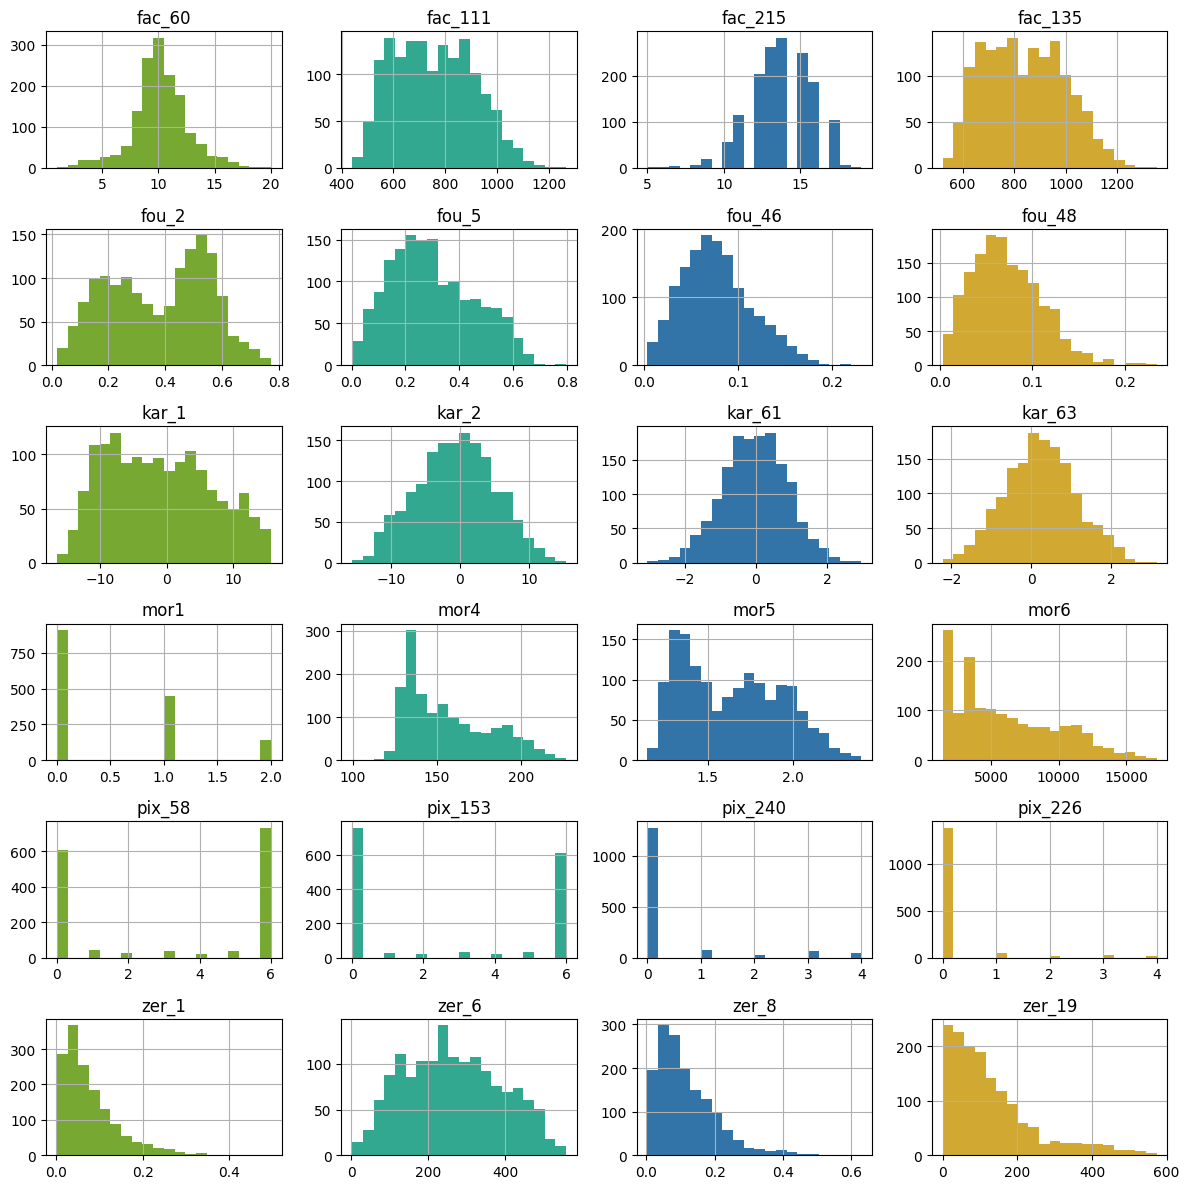

In [17]:
# Histogrammes pour les variables recensées ci-avant (écart-types minimum et maximum par groupe de variable)

fig, axes = plt.subplots(6,4, figsize=(12,12))

for i, (el, c) in enumerate(zip(["fac_60","fac_111","fac_215","fac_135","fou_2","fou_5","fou_46","fou_48","kar_1","kar_2",
                        "kar_61","kar_63","mor1","mor4","mor5","mor6","pix_58","pix_153","pix_240","pix_226",
                        "zer_1","zer_6","zer_8","zer_19"], ["#77a832","#32a890","#3273a8","#d1a932"]*6)):
    
    a = df_train.hist(column=el, bins=20, color=c, ax=axes.flatten()[i])

plt.tight_layout() 

plt.show()

In [18]:
descr_df["std"].max()

3766.3137261105558

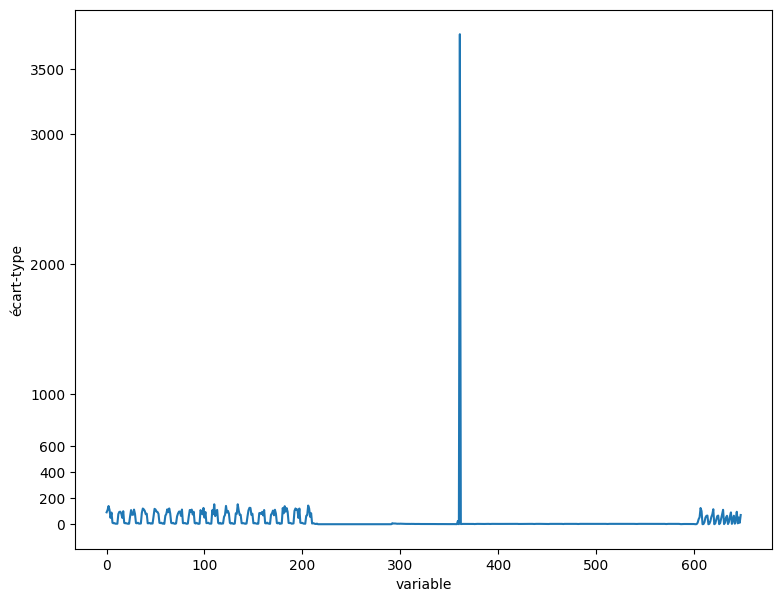

In [19]:
plt.figure(figsize=(9, 7))
plt.plot(descr_df["std"].values)
plt.yticks(ticks=[0, 200, 400, 600, 1000, 2000, 3000, 3500])
plt.xlabel("variable")
plt.ylabel("écart-type")
plt.show()

In [20]:
# Test de normalité Agostino-Pearson
agp_test = df_train.iloc[:,:-1].apply(stats.normaltest, axis=0).rename(index={0:"test_statistic",1:"p_value"})
agp_test.T.loc[agp_test.T.p_value > 0.05].shape

(46, 2)

In [21]:
agp_test.T.loc[agp_test.T.p_value > 0.05]

,test_statistic,p_value
fac_37,0.15732,0.92435
fac_66,1.37793,0.50209
fac_73,2.76294,0.25121
fac_99,0.44194,0.80174
fac_121,0.88927,0.64106
fac_150,5.32434,0.06980
fac_168,4.71516,0.09465
fac_172,5.82219,0.05442
fou_7,3.42290,0.18060
kar_6,2.33877,0.31056


In [22]:
# Test de normalité -- Jarque-Bera
jb_test = df_train.iloc[:,:-1].apply(stats.jarque_bera, axis=0).rename(index={0:"test_statistic",1:"p_value"})
jb_test.T.loc[jb_test.T.p_value > 0.05].shape

(47, 2)

In [23]:
jb_test.T.loc[jb_test.T.p_value > 0.05]

,test_statistic,p_value
fac_37,0.22196,0.89496
fac_66,1.30847,0.51984
fac_73,2.68766,0.26084
fac_99,0.37622,0.82852
fac_121,0.83346,0.65920
fac_150,5.22937,0.07319
fac_168,4.71790,0.09452
fac_172,5.81365,0.05465
fou_7,3.48536,0.17505
kar_6,2.32081,0.31336


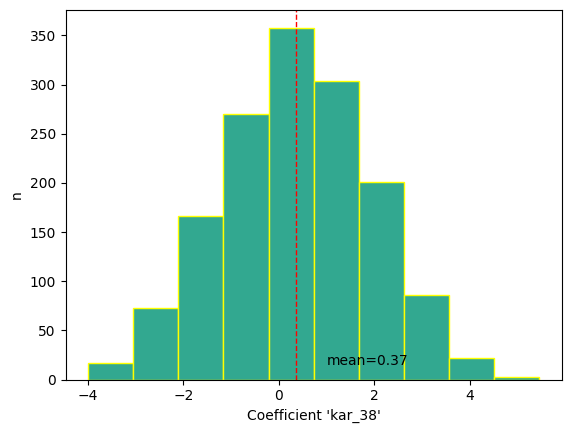

In [24]:
# Histogramme 'kar_38'

plt.hist(df_train.kar_38, color="#32a890", edgecolor="yellow")
plt.axvline(df_train.kar_38.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("Coefficient 'kar_38'")
plt.ylabel("n")
plt.annotate(f"mean={round(df_train.kar_38.mean(),2)}", xy=(int(df_train.kar_38.mean()), 4.5),
             xytext=(int(df_train.kar_38.mean()) + 1, 15))
plt.show()

In [25]:
## Détection des valeurs aberrantes avec l'intervalle inter-quartile

quartiles = df_train.describe().T[["25%","50%","75%"]]

quartiles.columns = ["Q1","Q2","Q3"]

quartiles["IQR"] = quartiles.Q3 - quartiles.Q1

quartiles["LIF"] = quartiles.Q1 - (1.5 * quartiles.IQR)
quartiles["UIF"] = quartiles.Q3 + (1.5 * quartiles.IQR)

quartiles["LOF"] = quartiles.Q1 - (3 * quartiles.IQR)
quartiles["UOF"] = quartiles.Q3 + (3 * quartiles.IQR)


In [26]:
quartiles

,Q1,Q2,Q3,IQR,LIF,UIF,LOF,UOF
fac_1,210.00000,274.00000,338.25000,128.25000,17.62500,530.62500,-174.75000,723.00000
fac_2,247.75000,322.00000,406.00000,158.25000,10.37500,643.37500,-227.00000,880.75000
fac_3,654.75000,765.50000,881.00000,226.25000,315.37500,1220.37500,-24.00000,1559.75000
fac_4,668.00000,741.00000,832.25000,164.25000,421.62500,1078.62500,175.25000,1325.00000
fac_5,608.00000,636.00000,667.00000,59.00000,519.50000,755.50000,431.00000,844.00000
...,...,...,...,...,...,...,...,...
zer_43,330.84933,397.00721,458.57487,127.72554,139.26102,650.16318,-52.32730,841.75150
zer_44,4.46561,7.49091,11.76879,7.30317,-6.48915,22.72355,-17.44391,33.67831
zer_45,39.82223,83.13308,128.56066,88.73843,-93.28542,261.66831,-226.39307,394.77596
zer_46,46.64168,54.17358,62.71810,16.07642,22.52704,86.83273,-1.58759,110.94736


In [27]:
# check
df_cp = df_train.iloc[:,:-1].T.copy()
df_bool = df_cp.lt(quartiles.LIF, axis=0) | df_cp.gt(quartiles.UIF, axis=0)

In [28]:
df_bool.T

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,fac_10,...,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
aberrants = df_bool.T.any(axis=0)
aberrants[aberrants == True].shape

(346,)

In [30]:
# Récupérer les noms des colonnes comprenant des valeurs aberrantes

aberrants[aberrants == True]

fac_3     True
fac_4     True
fac_5     True
fac_6     True
fac_14    True
          ... 
zer_42    True
zer_43    True
zer_44    True
zer_46    True
zer_47    True
Length: 346, dtype: bool

In [34]:
# dataframe dans lequel on a supprimé les valeurs aberrantes (remplacées par nan)

df_train_new = df_cp.T[~df_bool.T]
df_train_new

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,fac_10,...,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47
0,182.00000,192.00000,575.00000,657.00000,650.00000,702.00000,1.00000,9.00000,5.00000,6.00000,...,2.15959,30.37704,8.13780,4.24529,179.84887,331.68767,8.04001,16.30939,53.62373,487.26241
1,97.00000,185.00000,530.00000,688.00000,603.00000,688.00000,3.00000,6.00000,5.00000,4.00000,...,4.14423,55.36354,41.25013,4.92292,183.83757,324.73343,15.40222,54.79385,57.74679,554.88999
2,135.00000,207.00000,630.00000,685.00000,578.00000,599.00000,8.00000,9.00000,7.00000,3.00000,...,0.65374,7.68219,22.56606,9.17687,201.46880,535.09909,1.78629,15.74437,57.65181,643.78864
3,265.00000,277.00000,720.00000,728.00000,630.00000,674.00000,15.00000,9.00000,9.00000,7.00000,...,1.79961,14.27184,8.58904,13.33504,172.97290,273.34529,3.30595,7.34407,52.91831,406.85680
4,134.00000,164.00000,614.00000,618.00000,618.00000,656.00000,2.00000,8.00000,1.00000,6.00000,...,3.30120,15.24173,34.62034,7.06070,172.17341,321.38851,4.24516,16.98600,53.95255,521.36401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,305.00000,351.00000,791.00000,782.00000,609.00000,682.00000,24.00000,19.00000,15.00000,13.00000,...,3.69173,18.83482,108.61456,6.65934,161.26827,342.48176,3.55255,106.69039,47.98134,445.36168
1496,339.00000,371.00000,902.00000,765.00000,591.00000,709.00000,28.00000,15.00000,17.00000,8.00000,...,2.66273,8.17984,200.00521,5.37231,160.84919,310.22471,1.11798,154.78245,46.22615,421.71444
1497,260.00000,372.00000,974.00000,805.00000,623.00000,646.00000,21.00000,19.00000,18.00000,10.00000,...,4.84829,38.51240,173.62085,NaN,222.02748,411.29127,9.03392,113.84134,65.95043,469.76703
1498,328.00000,370.00000,889.00000,760.00000,617.00000,739.00000,27.00000,22.00000,15.00000,4.00000,...,3.71614,25.92869,172.25109,6.18237,153.21923,385.55962,6.02579,138.69061,44.40962,448.66096


In [52]:
# comptage des valeurs aberrantes supprimées par colonne

aberrants_colonne = df_train_new.isnull().sum().reset_index().rename(columns={"index":"variable", 0:"nb_aberrants"})
aberrants_colonne[aberrants_colonne["nb_aberrants"] > 0]

,variable,nb_aberrants
2,fac_3,1
3,fac_4,3
4,fac_5,45
5,fac_6,172
13,fac_14,9
...,...,...
643,zer_42,2
644,zer_43,10
645,zer_44,87
647,zer_46,2


In [53]:
# Test de normalité Agostino-Pearson
agp_test2 = df_train_new.apply(stats.normaltest, axis=0, nan_policy='omit').rename(index={0:"test_statistic",1:"p_value"})
agp_test2.T.loc[agp_test2.T.p_value > 0.05].shape 

# Test de normalité -- Jarque-Bera
jb_test2 = df_train_new.apply(stats.jarque_bera, axis=0).rename(index={0:"test_statistic",1:"p_value"})

jb_test2.T.loc[jb_test2.T.p_value > 0.05].shape 

(0, 2)

In [54]:
agp_test2.T.loc[agp_test2.T.p_value > 0.05]

,test_statistic,p_value
fac_17,2.05859,0.35726
fac_37,1.98758,0.37017
fac_73,5.02320,0.08114
fac_114,1.99162,0.36942
fac_121,3.29275,0.19275
fac_126,5.93082,0.05154
fac_168,1.21737,0.54407
fac_169,0.41673,0.81191
fac_182,1.77707,0.41126
fac_186,5.36107,0.06853


In [55]:
jb_test2.T.loc[jb_test2.T.p_value > 0.05]

,test_statistic,p_value


Après suppression des valeurs aberrantes, nous obtenons moitié moins de variables qui passent le test d'adéquation à la loi normale d'Agostino-Pearson, et aucune pour le test de Jarque Bera

In [56]:
## Calcul du rapport de corrélation

def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        sce = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        sct = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        
        if sce == 0:
            eta_carre = 0.0
        else:
            eta_carre = sce/sct
        return eta_carre

In [57]:
## Rapport de corrélation entre les modalités des variables qualitatives et quantitatives

numeric_cols = df_train.columns[:-1]
dvals = {}

for c in numeric_cols:
    dvals[c] = correlation_ratio(df_train["class"].values, df_train[c].to_numpy())

d = {}
d["etaCarre_class_x"] = dvals

In [58]:
df_rapport_corr = pd.DataFrame(d)
df_rapport_corr.sort_values("etaCarre_class_x", ascending=False)

,etaCarre_class_x
mor1,0.97660
mor2,0.86290
mor6,0.84755
fac_181,0.82358
mor5,0.80924
...,...
kar_35,0.04332
kar_61,0.03668
pix_37,0.03494
pix_226,0.02866


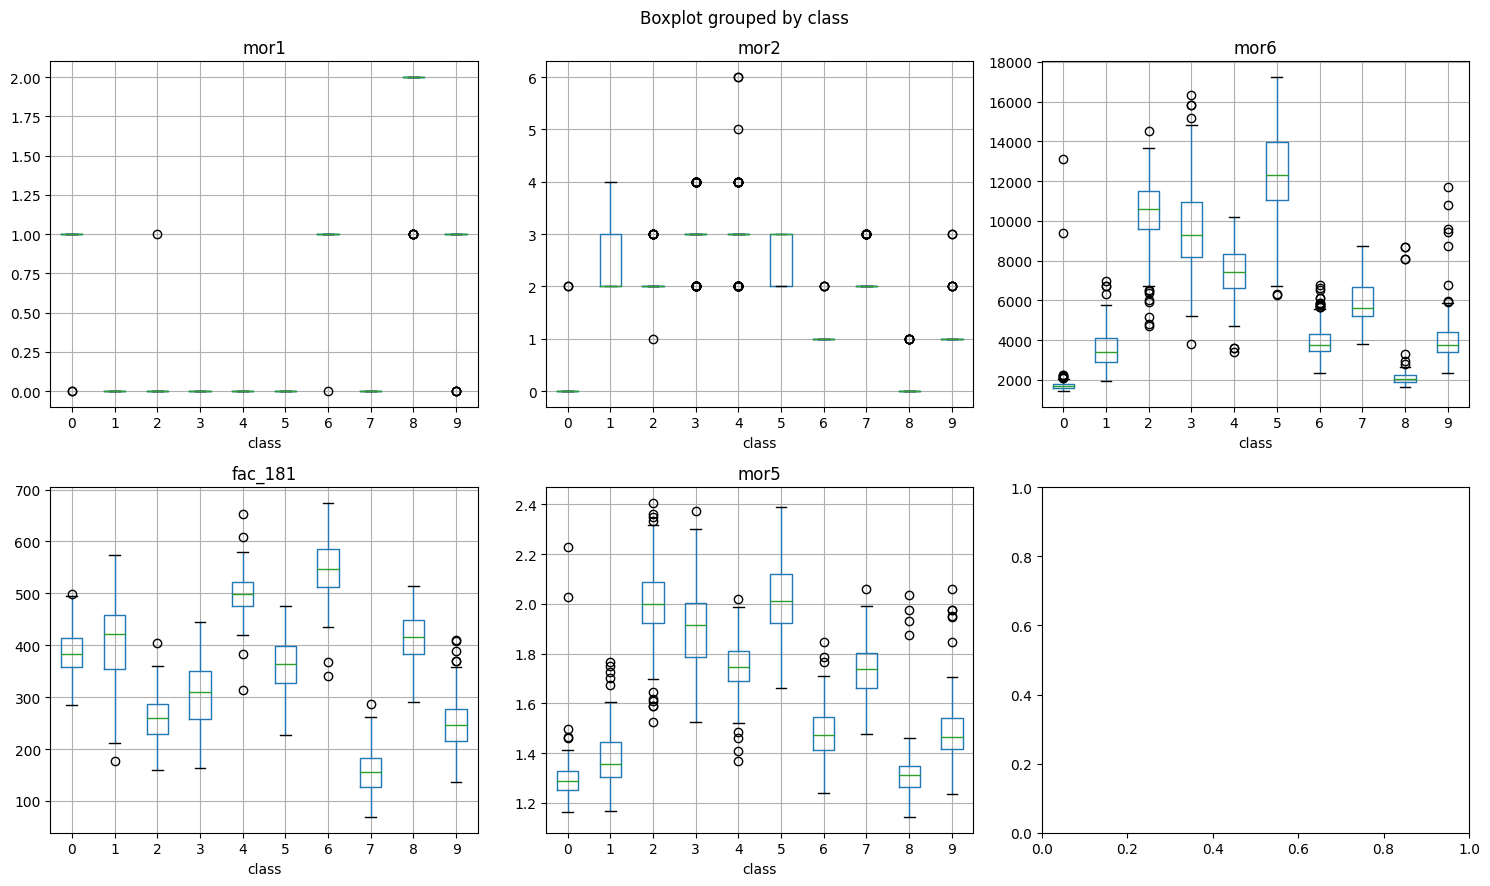

In [59]:
# Boxplots entre la variable class et les explicatives, lorsque etaCarre_x >= 0,8

fig, axes = plt.subplots(2,3, figsize=(15,9))

cols_rapport = df_rapport_corr[df_rapport_corr.etaCarre_class_x >= 0.8].sort_values("etaCarre_class_x", ascending=False).index

for i,el in enumerate(cols_rapport):
    if i == 5:
        break
    a = df_train.boxplot(el, by="class", ax=axes.flatten()[i])


plt.tight_layout() 
plt.show()

In [60]:
# Liste des variables ayant le carré du rapport de corrélation avec class >= 0,5
df_rapport_corr[df_rapport_corr.etaCarre_class_x >= 0.5].sort_values("etaCarre_class_x", ascending=False)

,etaCarre_class_x
mor1,0.97660
mor2,0.86290
mor6,0.84755
fac_181,0.82358
mor5,0.80924
mor4,0.78356
fac_29,0.76401
fac_1,0.76236
fac_133,0.75887
fac_65,0.74966


In [61]:
# Matrice des corrélations
corr = df_train.corr()
corr

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,fac_10,...,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47
fac_1,1.00000,0.50158,0.54485,0.48189,0.33890,0.11466,0.49213,0.33572,0.45365,0.36926,...,0.50057,0.12297,0.48737,0.13567,-0.11454,-0.39990,0.12089,0.55938,-0.11927,-0.68596
fac_2,0.50158,1.00000,0.64500,0.37091,0.27547,0.28850,0.78301,0.65653,0.54217,0.47994,...,0.52736,0.38152,0.42385,0.25291,0.25192,-0.08854,0.37172,0.44464,0.18550,-0.37642
fac_3,0.54485,0.64500,1.00000,-0.08810,0.09079,0.27645,0.89902,0.32162,0.10321,0.38826,...,0.56532,0.37665,0.49328,0.13173,0.09676,-0.23578,0.37023,0.45835,0.07330,-0.45747
fac_4,0.48189,0.37091,-0.08810,1.00000,0.47216,0.11500,0.00153,0.26993,0.78751,0.14959,...,0.08243,-0.15120,0.12139,0.37609,0.20614,-0.33751,-0.14547,0.18405,0.17491,-0.50895
fac_5,0.33890,0.27547,0.09079,0.47216,1.00000,0.05193,0.11591,0.18224,0.46151,0.22359,...,0.12140,-0.06150,0.17355,0.21535,0.28841,-0.30227,-0.06151,0.15689,0.28003,-0.34750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zer_43,-0.39990,-0.08854,-0.23578,-0.33751,-0.30227,-0.49317,-0.14937,0.23815,-0.36199,0.06265,...,-0.01444,0.29719,-0.06411,-0.01888,-0.34013,1.00000,0.28225,-0.11125,-0.39754,0.82913
zer_44,0.12089,0.37172,0.37023,-0.14547,-0.06151,-0.12374,0.38554,0.36119,-0.04485,0.29021,...,0.61140,0.99357,0.34682,-0.19528,-0.19273,0.28225,1.00000,0.33502,-0.20830,0.14529
zer_45,0.55938,0.44464,0.45835,0.18405,0.15689,0.20281,0.40025,0.24795,0.15132,0.24451,...,0.53604,0.33603,0.91144,-0.14564,-0.18887,-0.11125,0.33502,1.00000,-0.19311,-0.25051
zer_46,-0.11927,0.18550,0.07330,0.17491,0.28003,0.56926,0.15049,0.09941,0.36080,-0.07115,...,-0.07766,-0.21921,-0.20402,0.25225,0.98861,-0.39754,-0.20830,-0.19311,1.00000,-0.07702


In [62]:
# convertir la matrice de correlation en 3-uplets
# et garder les plus pertinents

paires_corr = corr.unstack()
paires_corr = paires_corr.reset_index().rename(columns={"level_0":"liste_var1", \
                                                        "level_1":"liste_var2", \
                                                        0:"correlation"})
paires_corr[~((paires_corr.liste_var1 == paires_corr.liste_var2) | (abs(paires_corr.correlation) < 0.85))]

,liste_var1,liste_var2,correlation
782,fac_2,fac_134,0.88245
1304,fac_3,fac_7,0.89902
1336,fac_3,fac_39,0.91056
1348,fac_3,fac_51,0.90926
1360,fac_3,fac_63,0.96114
...,...,...,...
419238,zer_44,zer_32,0.94821
419245,zer_44,zer_39,0.99357
419895,zer_45,zer_40,0.91144
420540,zer_46,zer_36,0.89197


## <a id="analyse_exploratoire_multi_acp" style="color:black">ANALYSE MULTIVARIÉE : ACP (basée sur la SVD)</a>

ACP réduire de la dimensionnalité

In [63]:
n = df_train.shape[0]

p = df_train.drop(["class"], axis=1).shape[1]

In [64]:
## Standardisation
sc = StandardScaler()
arr = sc.fit_transform(df_train.drop(["class"], axis=1))

In [65]:
arr.shape

(1500, 649)

In [66]:
# check moyenne = 0 pour chaque colonne
np.round(np.mean(arr, axis=0))

array([-0.,  0., -0., ...,  0.,  0., -0.])

In [67]:
# check écart-type = 1 pour chaque colonne
np.std(arr, axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [68]:
acp = PCA(svd_solver="full")
print(acp.__dict__)

{'n_components': None, 'copy': True, 'whiten': False, 'svd_solver': 'full', 'tol': 0.0, 'iterated_power': 'auto', 'random_state': None}


In [69]:
# Coordonnées factorielles lignes (individus)
coords = acp.fit_transform(arr)
print(acp.n_components_)

649


In [70]:
## Valeurs propres

val_propres = (acp.singular_values_**2/n)
print("Valeurs propres correctes si on utilise les valeurs singulières: acp.singular_values_**2/n) = \n", val_propres)

Valeurs propres correctes si on utilise les valeurs singulières: acp.singular_values_**2/n) = 
 [96.89751358 64.16537159 55.63605335 ...  0.          0.
  0.        ]


In [71]:
## Proportion de variance expliquée par chaque axe

ratio_expliq = acp.explained_variance_ratio_
np.round(ratio_expliq, 3)

array([0.149, 0.099, 0.086, ..., 0.   , 0.   , 0.   ])

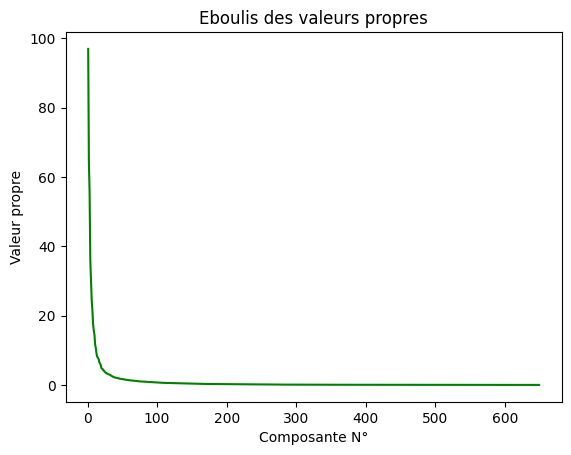

In [72]:
abcisse = np.arange(1, p+1)

plt.plot(abcisse, val_propres, "g-")
plt.title("Eboulis des valeurs propres")
plt.xlabel("Composante N°")
plt.ylabel("Valeur propre")
plt.show()

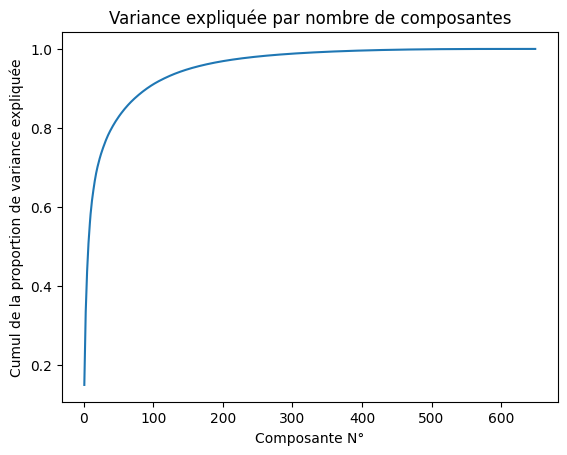

In [73]:
plt.plot(abcisse,np.cumsum(ratio_expliq))
plt.title("Variance expliquée par nombre de composantes")
plt.ylabel("Cumul de la proportion de variance expliquée")
plt.xlabel("Composante N°")
plt.show()

In [74]:
df_val_acp = pd.DataFrame({"composante_no":abcisse, "valeur_propre":val_propres, \
                           "variance_expliquee":ratio_expliq, "cumul_var_expliquee":np.cumsum(ratio_expliq)})
df_val_acp

,composante_no,valeur_propre,variance_expliquee,cumul_var_expliquee
0,1,96.89751,0.14930,0.14930
1,2,64.16537,0.09887,0.24817
2,3,55.63605,0.08573,0.33390
3,4,36.21877,0.05581,0.38970
4,5,30.75879,0.04739,0.43710
...,...,...,...,...
644,645,0.00000,0.00000,1.00000
645,646,0.00000,0.00000,1.00000
646,647,0.00000,0.00000,1.00000
647,648,0.00000,0.00000,1.00000


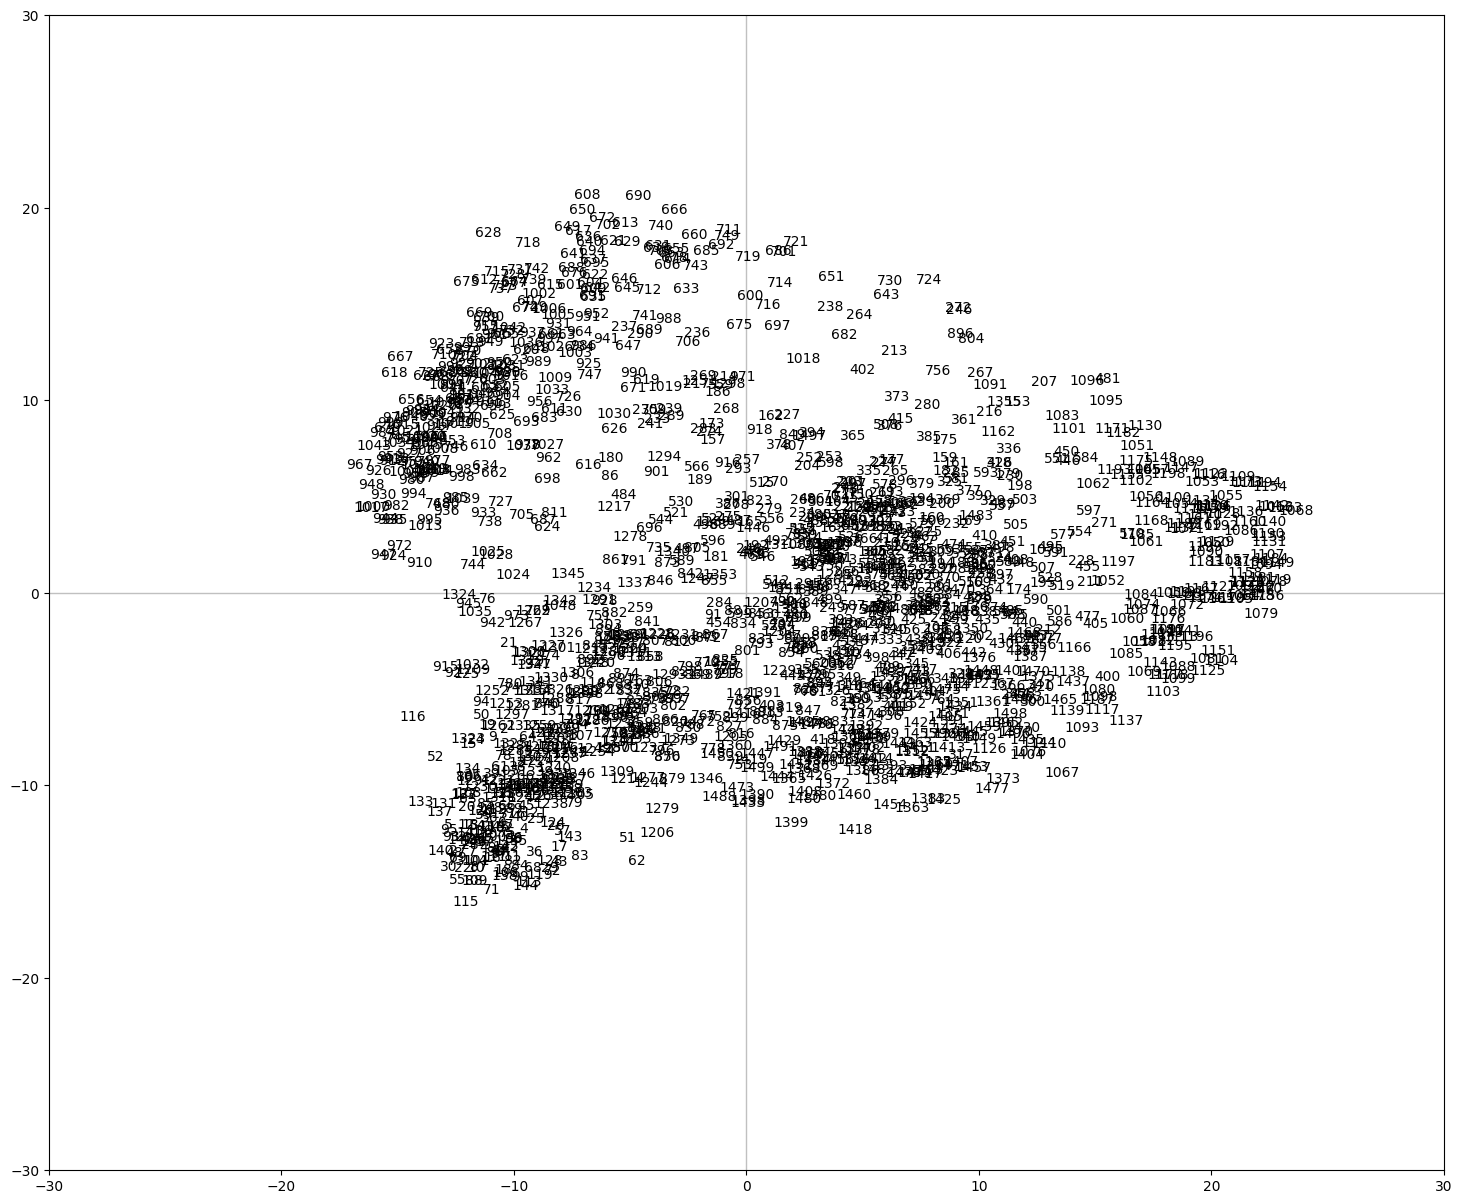

In [75]:
## Premier plan factoriel

fig, axes = plt.subplots(figsize=(18,15)) 
axes.set_xlim(-30,30)
axes.set_ylim(-30,30)

for i in range(n):
    plt.annotate(df_train.index[i], (coords[i,0], coords[i,1]))

plt.plot([-30,30], [0,0], color="silver", linestyle="-", linewidth=1)
plt.plot([0,0], [-30,30], color="silver", linestyle="-", linewidth=1)

plt.show()

A titre d'illustration, pas d'analyse de ce plan.

In [76]:
## Représentation des variables et outils d'aide à l'interprétation
vec_propres = acp.components_
sqrt_valprop = np.sqrt(val_propres)
corr_var_cp = np.zeros((p,p))

for k in range(p):
    corr_var_cp[:,k] = vec_propres[k,:] * sqrt_valprop[k]

dict_corrvarcp = {f"COR_CP_{x+1}":corr_var_cp[:,x] for x in range(p)}
df_corrvarcp = pd.DataFrame(dict({"variables":df_train.drop(["class"], axis=1).columns}, **dict_corrvarcp)) 


In [77]:
# Corrélations entre les variables et les 152 premières composantes
# les 152 premières composantes sont choisies après analyse du cumul de variance expliquée
check_corracp = df_corrvarcp.iloc[:, :153].set_index("variables").unstack().reset_index()
check_corracp = check_corracp.rename(columns={"level_0":"composante_no", 0:"correlation"})

check_corracp[abs(check_corracp.correlation) >= 0.65].sort_values("correlation", ascending=False)

,composante_no,variables,correlation
292,COR_CP_1,kar_1,0.93581
18,COR_CP_1,fac_19,0.78513
6,COR_CP_1,fac_7,0.76401
176,COR_CP_1,fac_177,0.75982
942,COR_CP_2,kar_2,0.75252
164,COR_CP_1,fac_165,0.74888
198,COR_CP_1,fac_199,0.72950
68,COR_CP_1,fac_69,0.72682
90,COR_CP_1,fac_91,0.71962
182,COR_CP_1,fac_183,0.71573


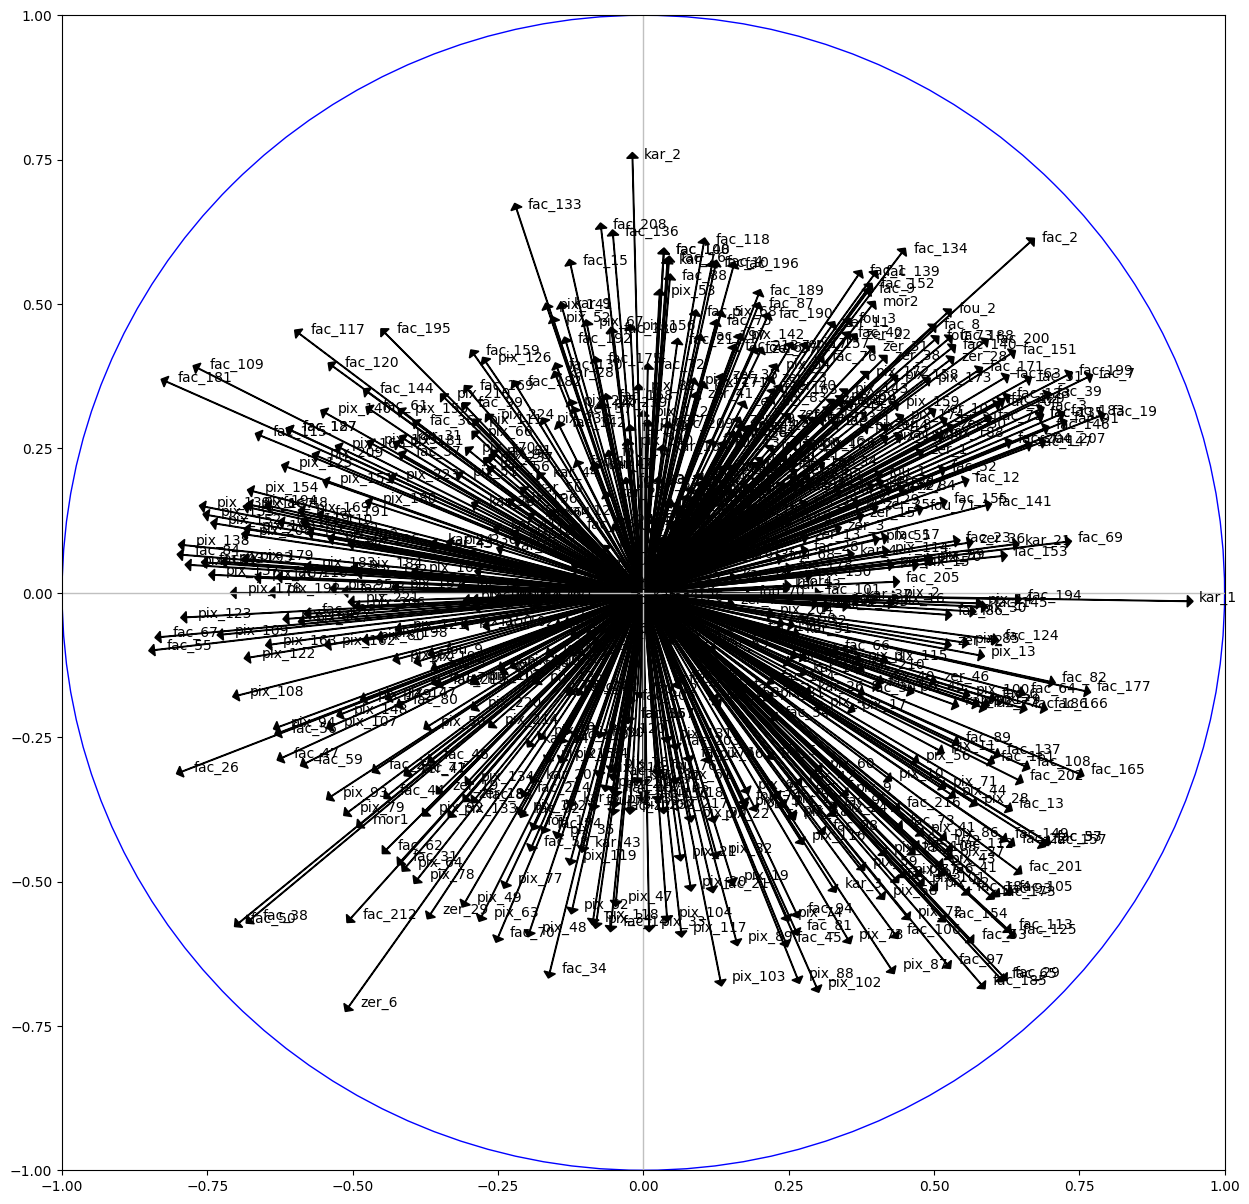

In [78]:
## Cercle de corrélations

fig, axes = plt.subplots(figsize=(15,15))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(df_corrvarcp.iloc[j,0], (df_corrvarcp.iloc[j,1] + 0.02,df_corrvarcp.iloc[j,2]))
    plt.arrow(0,0,df_corrvarcp.iloc[j,1],df_corrvarcp.iloc[j,2],head_width=0.02, head_length=0.01, fc="k")

plt.plot([-1,1], [0,0], color='silver', linestyle='-', linewidth=1)
plt.plot([0,0], [-1,1], color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

In [79]:
## COS² (variables)
df_cosvaracp = df_corrvarcp.copy()
df_cosvaracp.iloc[:,1:] = df_cosvaracp.iloc[:,1:]**2

dict_rename = {f"COR_CP_{x+1}":f"COS_VAR_CP{x+1}" for x in range(p)}
df_cosvaracp.rename(columns=dict_rename, inplace=True)

In [80]:
# Cosinus carré entre les variables et les 152 premières composantes
check_cosvaracp = df_cosvaracp.iloc[:, :153].set_index("variables").unstack().reset_index()
check_cosvaracp = check_cosvaracp.rename(columns={"level_0":"composante_no", 0:"cosinus2"})

check_cosvaracp[abs(check_cosvaracp.cosinus2) >= 0.5].sort_values("cosinus2", ascending=False)

,composante_no,variables,cosinus2
292,COS_VAR_CP1,kar_1,0.87574
54,COS_VAR_CP1,fac_55,0.70724
66,COS_VAR_CP1,fac_67,0.68951
180,COS_VAR_CP1,fac_181,0.67321
25,COS_VAR_CP1,fac_26,0.63036
83,COS_VAR_CP1,fac_84,0.62755
499,COS_VAR_CP1,pix_138,0.62428
484,COS_VAR_CP1,pix_123,0.61782
18,COS_VAR_CP1,fac_19,0.61643
485,COS_VAR_CP1,pix_124,0.60598


In [81]:
## Contribution (variables)
df_ctrvar = df_cosvaracp.copy()
for k in range(p):
    df_ctrvar.iloc[:,k+1] = df_ctrvar.iloc[:,k+1]/val_propres[k]

dict_rename = {f"COS_VAR_CP{x+1}":f"CTR_VAR_CP{x+1}" for x in range(p)}
df_ctrvar.rename(columns=dict_rename, inplace=True)


In [82]:
# Contribution entre les variables et les 152 premières composantes
check_ctrvar = df_ctrvar.iloc[:, :153].set_index("variables").unstack().reset_index()
check_ctrvar = check_ctrvar.rename(columns={"level_0":"composante_no", 0:"contribution"})

check_ctrvar.sort_values(["composante_no","contribution"], ascending=[True,False])

,composante_no,variables,contribution
292,CTR_VAR_CP1,kar_1,0.00904
54,CTR_VAR_CP1,fac_55,0.00730
66,CTR_VAR_CP1,fac_67,0.00712
180,CTR_VAR_CP1,fac_181,0.00695
25,CTR_VAR_CP1,fac_26,0.00651
...,...,...,...
63748,CTR_VAR_CP99,fac_147,0.00000
64176,CTR_VAR_CP99,pix_213,0.00000
63807,CTR_VAR_CP99,fac_206,0.00000
63670,CTR_VAR_CP99,fac_69,0.00000


## <a id="requirements" style="color:black">REQUIREMENTS.txt</a>

<span style="color:orange">Ce notebook a été créé avec python 3.8</span>

Requirements.txt  

```
absl-py==2.1.0
anyio==4.0.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0       
arrow==1.2.3
asttokens==2.4.0
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==4.2.4
certifi==2023.7.22
cffi==1.15.1
charset-normalizer==2.0.12
colorama==0.4.6
comm==0.1.4
cycler==0.11.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.3
executing==1.2.0
fastjsonschema==2.18.0
fonttools==4.42.1
fqdn==1.5.1
gast==0.3.3
google-auth==1.35.0
google-auth-oauthlib==0.4.6        
google-pasta==0.2.0
grpcio==1.66.2
h5py==2.10.0
htmlmin==0.1.12
idna==3.4
ImageHash==4.3.1
importlib-metadata==8.5.0
importlib-resources==6.4.5
ipykernel==6.25.2
ipython==8.12.0
ipython-genutils==0.2.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.0
Jinja2==3.1.2
joblib==1.1.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.0
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-client==8.3.1
jupyter-console==6.6.3
jupyter-core==5.3.1
jupyter-events==0.7.0
jupyter-lsp==2.2.0
jupyter-server==2.7.3
jupyter-server-terminals==0.4.4
jupyterlab==4.0.6
jupyterlab-pygments==0.2.2
jupyterlab-server==2.25.0
jupyterlab-widgets==3.0.9
Keras==2.4.3
Keras-Preprocessing==1.1.2
kiwisolver==1.4.5
Markdown==3.7
MarkupSafe==2.1.3
matplotlib==3.5.3
matplotlib-inline==0.1.6
missingno==0.5.2
mistune==3.0.1
multimethod==1.8
nbclient==0.8.0
nbconvert==7.8.0
nbformat==5.9.2
nest-asyncio==1.5.8
networkx==3.1
notebook==7.0.3
notebook-shim==0.2.3
numpy==1.22.0
oauthlib==3.2.2
opt-einsum==3.4.0
overrides==7.4.0
packaging==23.1
pandas==1.4.0
pandas-profiling==3.3.0
pandocfilters==1.5.0
parso==0.8.3
patsy==0.5.3
pexpect==4.8.0
phik==0.12.3
pickleshare==0.7.5
Pillow==10.0.1
pkgutil-resolve-name==1.3.10
platformdirs==3.10.0
prometheus-client==0.17.1
prompt-toolkit==3.0.39
protobuf==3.20.3
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
pyasn1==0.6.1
pyasn1-modules==0.4.1
pycparser==2.21
pydantic==1.9.2
Pygments==2.16.1
pyparsing==3.1.1
python-dateutil==2.8.2
python-json-logger==2.0.7
pytz==2023.3.post1
PyWavelets==1.4.1
pywin32==306
pywinpty==2.0.13
PyYAML==6.0.1
pyzmq==25.1.1
qtconsole==5.4.4
QtPy==2.4.0
referencing==0.30.2
requests==2.28.0
requests-oauthlib==2.0.0
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.10.3
rsa==4.9
scikit-learn==0.23.2
scipy==1.4.1
seaborn==0.11.2
Send2Trash==1.8.2
six==1.16.0
sniffio==1.3.0
soupsieve==2.5
stack-data==0.6.2
statsmodels==0.13.5
tangled-up-in-unicode==0.2.0
tensorboard==2.2.2
tensorboard-plugin-wit==1.8.1
tensorflow==2.2.0
tensorflow-estimator==2.2.0
termcolor==2.4.0
terminado==0.17.1
threadpoolctl==3.5.0
tinycss2==1.2.1
tomli==2.0.1
tornado==6.3.3
tqdm==4.64.1
traitlets==5.10.0
typing-extensions==4.7.1
uri-template==1.3.0
urllib3==1.26.16
visions==0.7.5
wcwidth==0.2.6
webcolors==1.13
webencodings==0.5.1
websocket-client==1.6.3
werkzeug==3.0.4
widgetsnbextension==4.0.9
wrapt==1.16.0
xlrd==2.0.1
zipp==3.20.2
```